<a href="https://colab.research.google.com/github/Yuvrajk2809/CodSoft/blob/Supervised-Learning-Project/Titanic_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files
data = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [ ]:
df = pd.read_csv("titanic_train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   C         891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 38.4 KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
sex = pd.get_dummies(df['Sex'],drop_first = True)

In [ ]:
df.drop(['Sex','PassengerId','Name','Ticket','Fare'],axis = 1,inplace=True)

In [ ]:
df.drop('Cabin',axis = 1,inplace=True)

In [ ]:
df = pd.concat([df,sex],axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  861 non-null    object 
 6   male      891 non-null    uint8  
dtypes: float64(1), int64(4), object(1), uint8(1)
memory usage: 42.8+ KB


In [ ]:
embarked=pd.get_dummies(df['Embarked'])

In [ ]:
df.drop('Embarked',axis = 1,inplace=True)

In [ ]:
df = pd.concat([df,embarked],axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   C         891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 38.4 KB


In [ ]:
df.groupby('Pclass').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   C         891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 38.4 KB


In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,0,0,1,0,0
2,1,3,26.0,0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,0,0
4,0,3,35.0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x=df.drop('Survived',axis=1)

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(x)

In [ ]:
scaled_features

array([[ 0.82737724, -0.53383369,  0.43279337, ..., -0.46427634,
        -0.29649973,  0.64190683],
       [-1.56610693,  0.67489052,  0.43279337, ...,  2.15388962,
        -0.29649973, -1.55785849],
       [ 0.82737724, -0.23165264, -0.4745452 , ..., -0.46427634,
        -0.29649973,  0.64190683],
       ...,
       [ 0.82737724, -0.38274316,  0.43279337, ..., -0.46427634,
        -0.29649973,  0.64190683],
       [-1.56610693, -0.23165264, -0.4745452 , ...,  2.15388962,
        -0.29649973, -1.55785849],
       [ 0.82737724,  0.22161894, -0.4745452 , ..., -0.46427634,
         3.37268439, -1.55785849]])

In [ ]:
df.columns[:-1]

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'C', 'Q'], dtype='object')

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Survived,Pclass,Age,SibSp,Parch,male,C,Q
0,0.827377,-0.533834,0.432793,-0.473674,0.737695,-0.464276,-0.2965,0.641907
1,-1.566107,0.674891,0.432793,-0.473674,-1.355574,2.153890,-0.2965,-1.557858
2,0.827377,-0.231653,-0.474545,-0.473674,-1.355574,-0.464276,-0.2965,0.641907
3,-1.566107,0.448255,0.432793,-0.473674,-1.355574,-0.464276,-0.2965,-1.557858
4,0.827377,0.448255,-0.474545,-0.473674,0.737695,-0.464276,-0.2965,0.641907


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Survived'],
                                                    test_size=0.30)

In [ ]:
y_test.shape

(268,)

In [ ]:
X_train.shape

(623, 8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[126  30]
 [ 39  73]]


In [ ]:
((126+73)/268)

0.7425373134328358

In [ ]:
accuracy_score(y_test,pred)*100

74.25373134328358

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       156
           1       0.71      0.65      0.68       112

    accuracy                           0.74       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [ ]:
error_rate = []

for i in range(1,30):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

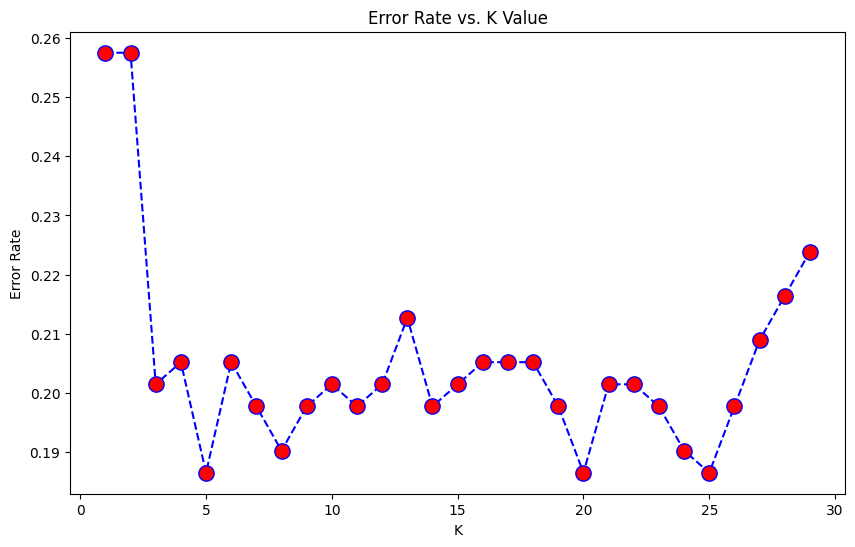

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=11)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[147   9]
 [ 41  71]]


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       156
           1       0.89      0.63      0.74       112

    accuracy                           0.81       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.83      0.81      0.81       268



In [ ]:
((147+71)/268)*100

81.34328358208955